In [16]:
from hypothesis import given
from hypothesis.strategies import lists, integers

from IPython.lib.display import YouTubeVideo

# Counting the number of inversions in a sequence

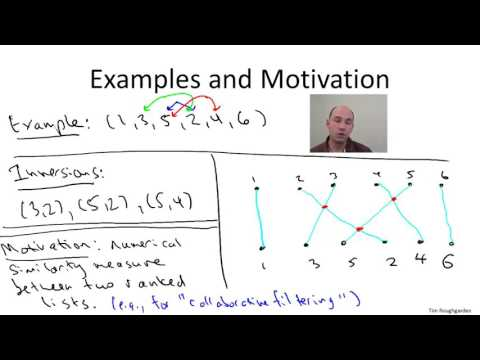

In [17]:
YouTubeVideo('7_AJfusC6UQ')

# $O(n^2)$ brute-force algorithm for counting the number of inversions

In [2]:
def brute_force_solution(sequence):
    """Naive O(n^2) algorithm for counting the number of inversions."""
    n = len(sequence)
    number_inversions = 0
    for i in range(n):
        for j in range(i + 1, n):
            if sequence[i] > sequence[j]:
                number_inversions += 1
    return number_inversions

# $O(n \log n)$ algorithm for counting the number of inversions

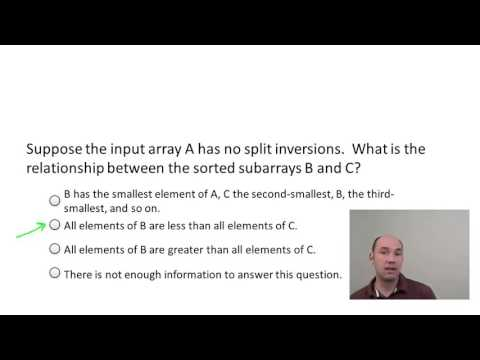

In [18]:
YouTubeVideo("I6ygiW8xN7Y")

In [11]:
def _modified_merge(sequence1, sequence2):
    """Merge two sequences whilst keeping track of the number of split inversions."""
    merged = []
    number_inversions = 0
    while len(sequence1) > 0 and len(sequence2) > 0:
        b = sequence1[0]
        c = sequence2[0]
        if b <= c:
            sequence1 = sequence1[1:]
            merged.append(b)
        else:
            number_inversions += len(sequence1)
            sequence2 = sequence2[1:]
            merged.append(c)

    return merged + sequence1 + sequence2, number_inversions


def modified_merge_sort(sequence):
    """Implementation of the merge sort algorithm that also tracks number of inversions."""
    n = len(sequence)
    if n <= 1:
        sorted_sequence = sequence
        total_inversions = 0
    else:
        m = n // 2
        left_half, left_inversions = modified_merge_sort(sequence[:m])
        right_half, right_inversions = modified_merge_sort(sequence[m:])
        sorted_sequence, split_inversions = _modified_merge(left_half, right_half)
        total_inversions = left_inversions + right_inversions + split_inversions
    return sorted_sequence, total_inversions


In [14]:
@given(lists(integers()))
def test_efficient_solution(l):
    expected_result = brute_force_solution(l)
    _, actual_result = modified_merge_sort(l)
    assert expected_result == actual_result

In [15]:
test_efficient_solution()